In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_mouse_study_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
merged_mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
merged_mouse_study_df["Mouse ID"].nunique()

249

In [12]:
duplicate_mice_df = merged_mouse_study_df[merged_mouse_study_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
merged_mouse_study_df = merged_mouse_study_df[merged_mouse_study_df["Mouse ID"]!="g989"]
merged_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
len(merged_mouse_study_df['Mouse ID'].unique())

248

In [15]:
drug_regimen_df = merged_mouse_study_df.groupby("Drug Regimen")
tumor_mean = drug_regimen_df["Tumor Volume (mm3)"].mean()
tumor_median = drug_regimen_df["Tumor Volume (mm3)"].median()
tumor_var = drug_regimen_df["Tumor Volume (mm3)"].var()
tumor_stddev = drug_regimen_df["Tumor Volume (mm3)"].std()
tumor_stderr = drug_regimen_df["Tumor Volume (mm3)"].sem()

drug_regimen_summary_df = pd.DataFrame([tumor_mean,tumor_median,tumor_var,tumor_stddev,tumor_stderr]).T
drug_regimen_summary_df.columns = ["Tumor Volume Mean",
                      "Tumor Volume Median",
                      "Tumor Volume Variance",
                      "Tumor Volume Std. Dev.",
                      "Tumor Volume Std. Err."]
drug_regimen_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
aggregations = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}

merged_mouse_study_df.groupby("Drug Regimen").agg(aggregations)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

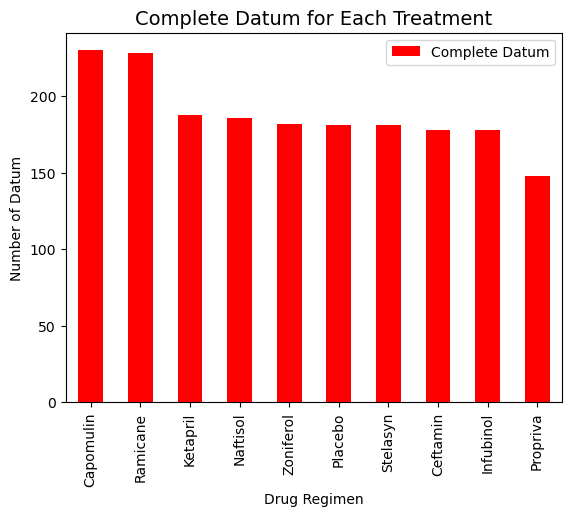

In [24]:
all_the_datum = drug_regimen_df["Drug Regimen"].count()
all_the_datum_df = pd.DataFrame(all_the_datum)
all_the_datum_df.columns = ["Complete Datum"]
all_the_datum_plot = all_the_datum_df.sort_values("Complete Datum", ascending = False).plot(kind="bar", color="r")
all_the_datum_plot.set_xlabel("Drug Regimen")
all_the_datum_plot.set_ylabel("Number of Datum")
plt.title("Complete Datum for Each Treatment", fontsize = 14)
plt.show()

Text(0, 0.5, 'Number of Datum')

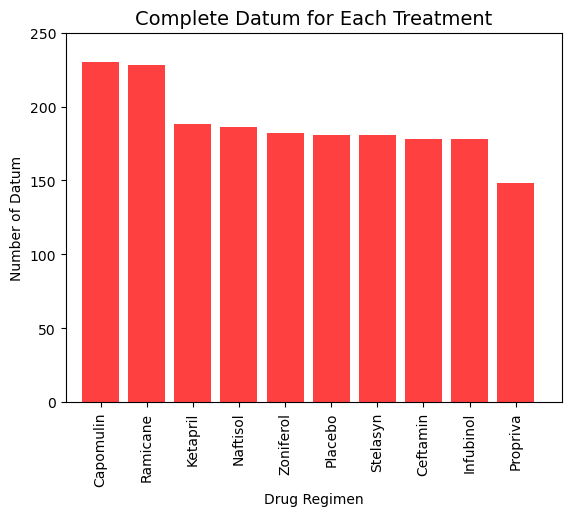

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(all_the_datum_df))
tick_locations = [value for value in x_axis]
all_the_datum_df = all_the_datum_df.sort_values("Complete Datum", ascending = False)
plt.bar(x_axis, all_the_datum_df["Complete Datum"], color='r', alpha = 0.75, align="center")
plt.xticks(tick_locations, all_the_datum_df.index, rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, 250)
plt.title("Complete Datum for Each Treatment", fontsize = 14)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Datum")

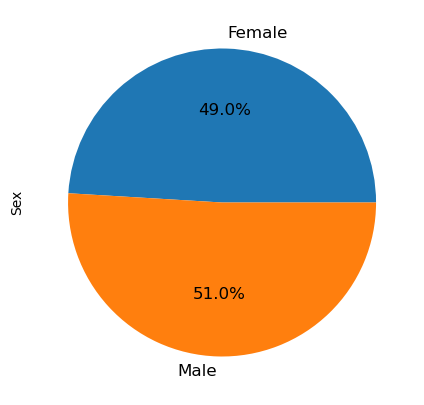

In [26]:
mouse_sex_df = merged_mouse_study_df.groupby("Sex")
sex_count = mouse_sex_df["Sex"].count()
sex_plot = sex_count.plot(kind = "pie", y = "Sex", autopct="%1.1f%%", fontsize=12, figsize=(5, 5))

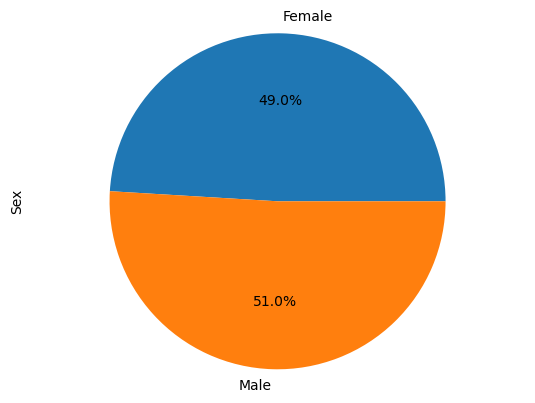

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
count = [sex_count["Female"],sex_count["Male"]]
plt.pie(count, labels = labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()